In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]")\
          .appName("sunshine_v2")\
          .getOrCreate()

In [2]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.feature import *

In [3]:
df = spark.read.\
       option("header", "true").\
       option("delimiter", ";").\
       parquet("finall.parquet")

df.show(vertical=True)

-RECORD 0---------------------------------------------------------------------------
 features_smile_msisdn                                       | 22506138989          
 features_smile_nombre_sms_sortants                          | 2                    
 features_smile_nombre_correspondant_sms_sortant             | 1                    
 features_smile_nombre_appels_sortants                       | 0                    
 features_smile_nombre_correspondant_appels_sortant          | 2                    
 features_smile_nombre_correspondant_distinct_appels_sortant | 1                    
 features_smile_duree_totale_appel_sortant                   | 0                    
 features_smile_duree_moyenne_appel_sortant                  | 0.0                  
 features_smile_nombre_sms_entrants                          | 5                    
 features_smile_nombre_correspondant_sms_entrant             | 3                    
 features_smile_nombre_appel_entrants                        | 4 

In [4]:
df.select("features_smile_nombre_appels","features_smile_nombre_correspondants_sms","features_smile_nombre_correspondants","features_smile_nombre_correspondants_distincts","features_smile_nombre_correspondants_distincts_appels","features_smile_nombre_correspondants_appels").describe().show()

+-------+----------------------------+----------------------------------------+------------------------------------+----------------------------------------------+-----------------------------------------------------+-------------------------------------------+
|summary|features_smile_nombre_appels|features_smile_nombre_correspondants_sms|features_smile_nombre_correspondants|features_smile_nombre_correspondants_distincts|features_smile_nombre_correspondants_distincts_appels|features_smile_nombre_correspondants_appels|
+-------+----------------------------+----------------------------------------+------------------------------------+----------------------------------------------+-----------------------------------------------------+-------------------------------------------+
|  count|                     1761756|                                 1761756|                             1761756|                                       1761756|                                              17617

In [5]:
tmp = df.select("features_smile_temps_moyen_evenement", "features_smile_variance_evenement", "features_smile_temps_moyen_appel", "features_smile_variance_appel", "features_smile_temps_moyen_sms", "features_smile_variance_sms")

In [7]:
tmp.describe().show()

+-------+------------------------------------+---------------------------------+--------------------------------+-----------------------------+------------------------------+---------------------------+
|summary|features_smile_temps_moyen_evenement|features_smile_variance_evenement|features_smile_temps_moyen_appel|features_smile_variance_appel|features_smile_temps_moyen_sms|features_smile_variance_sms|
+-------+------------------------------------+---------------------------------+--------------------------------+-----------------------------+------------------------------+---------------------------+
|  count|                             1761756|                          1761756|                         1761756|                      1761756|                       1761756|                    1761756|
|   mean|                                null|                             null|                            null|                         null|                          null|              

In [3]:
dexter = spark.read.option("header","true").csv("interim_data_process_2.csv")
#dexter.show()

In [5]:
dexter.printSchema()

root
 |-- msisdn: string (nullable = true)
 |-- nbre_call_entrant_inter: string (nullable = true)
 |-- nbre_call_sortant_inter: string (nullable = true)
 |-- duree_entrant_inter: string (nullable = true)
 |-- duree_sortant_inter: string (nullable = true)
 |-- duree_total_inter: string (nullable = true)
 |-- duree_moy_sortant_inter: string (nullable = true)
 |-- duree_moy_inter: string (nullable = true)
 |-- nbr_cor_dist: string (nullable = true)
 |-- nbr_appel_abs_entr_moy: string (nullable = true)
 |-- nbr_appel_abs_entr_med: string (nullable = true)
 |-- nbr_appel_abs_entr_tot: string (nullable = true)
 |-- nbr_entrant_distinct_absence_tot: string (nullable = true)
 |-- nbr_entrant_distinct_absence_med: string (nullable = true)
 |-- nbr_appel_abs_sort_moy: string (nullable = true)
 |-- nbr_appel_abs_sort_med: string (nullable = true)
 |-- nbr_appel_abs_sort_tot: string (nullable = true)
 |-- maxtcpsession: string (nullable = true)
 |-- nbyte: string (nullable = true)
 |-- nbytetcp: s

In [16]:
df.count()

1761756

In [5]:
#dexter.columns

In [17]:
dexter1 = dexter

In [18]:
dexter2 = dexter1.select('msisdn',
 'duree_total_inter',
 'duree_moy_sortant_inter',
 'duree_moy_inter',
 'nbr_appel_abs_entr_moy',
 'nbr_appel_abs_entr_med',
 'nbr_appel_abs_entr_tot',
 'nbr_entrant_distinct_absence_tot',
 'nbr_entrant_distinct_absence_med',
 'nbr_appel_abs_sort_moy',
 'nbr_appel_abs_sort_med',
 'nbr_appel_abs_sort_tot',
 'maxtcpsession',
 'nbyte',
 'nbytetcp',
 'nbyteudp',
 'byteweb',
 'bytep2p',
 'bytedownload',
 'bytenews',
 'bytemail',
 'byteothers',
 'bytecontrol',
 'bytegames',
 'bytestreaming',
 'bytechat',
 'bytevoip',
 'packvpn',
 'bytevvm',
 'bytestreamavsp',
 'nbre_transaction_tot',
 'nbre_transaction_med',
 'nbre_distinct_msisdn_tot',
 'nbre_distinct_msisdn_med',
 'duree_tot',
 'duree_med',
 'nombre_transaction_erecharge',
 'montant_erecharge',
 'montant',
 'montant_moy',
 'nbr_om_transact',
 'volumepartage_data_med',
 'nbr_partage_data',
 'total_partage_data',
 'nombre_distinct_profil',
 'nbr_sms_total_sortant_ofnet',
 'nbr_sms_sortant_med_ofnet',
 'nbr_sms_sortant_moy_ofnet',
 'nbr_appel_sortant_moy_ofnet',
 'nbr_appel_total_sortant_ofnet',
 'nbr_appel_sortant_med_ofnet',
 'duree_total_sortant_ofnet',
 'duree_sortant_med_ofnet',
 'duree_sortant_moy_ofnet',
 'nbr_sms_total_sortant_onnet',
 'nbr_sms_sortant_med_onnet',
 'nbr_sms_sortant_moy_onnet',
 'nbr_appel_sortant_moy_onnet',
 'nbr_appel_total_sortant_onnet',
 'nbr_appel_sortant_med_onnet',
 'duree_total_sortant_onnet',
 'duree_sortant_med_onnet',
 'duree_sortant_moy_onnet',
 'nbr_rech_sos',
 'nbr_moy_sos',
 'montant_tot_sos',
 'montant_moy_sos',
 'nbr_corr_dist_entrant_sms_tot',
 'nbr_corr_dist_entrant_sms_med',
 'nbr_corr_dist_sortant_sms_tot',
 'nbr_corr_dist_sortant_sms_med',
 'nbr_duree_data_tot',
 'nbr_duree_data_med',
 'nbr_duree_data_moy',
 'volume_family_data_med',
 'nbr_family_data',
 'family_data_tot',
 'nbre_call_complice',
 'duree',
 'duree_moy_call_complice',
 'volume_data_total',
 'volume_data_moy',
 'volume_data_med',
 'smsisdn',
 'nbre_corr_sortant',
 'nbre_corr_sortant_distinc',
 'nbre_corr_entrant',
 'nbre_corr_entrant_distinct',
 'taux_inter')

In [19]:
df1 = df

In [21]:
#df1.write.csv('smile_features.csv')

In [28]:
dexter2 = dexter2.withColumn("msisdn_dexter", concat(lit("225"),col("msisdn_dexter")))

In [22]:
dexter2 = dexter2.withColumnRenamed("msisdn", "msisdn_dexter")

In [29]:
df3 = df1.join(dexter2, df1.features_smile_msisdn == dexter2.msisdn_dexter, "inner")

In [30]:
df3.count()

1763284

In [32]:
#df3.write.parquet("lastt.parquet")

In [20]:
#df3.write.csv('thelast.csv')

In [24]:
df3 = df3.drop("msisdn_dexter")

In [26]:
df3.columns

['features_smile_msisdn',
 'features_smile_nombre_sms_sortants',
 'features_smile_nombre_correspondant_sms_sortant',
 'features_smile_nombre_appels_sortants',
 'features_smile_nombre_correspondant_appels_sortant',
 'features_smile_nombre_correspondant_distinct_appels_sortant',
 'features_smile_duree_totale_appel_sortant',
 'features_smile_duree_moyenne_appel_sortant',
 'features_smile_nombre_sms_entrants',
 'features_smile_nombre_correspondant_sms_entrant',
 'features_smile_nombre_appel_entrants',
 'features_smile_nombre_correspondant_appel_entrant',
 'features_smile_nombre_correspondant_appel_distinct_entrant',
 'features_smile_duree_totale_appel_entrant',
 'features_smile_duree_moyenne_appel_entrant',
 'features_smile_nombre_sms',
 'features_smile_nombre_appels',
 'features_smile_nombre_correspondants_sms',
 'features_smile_nombre_correspondants',
 'features_smile_nombre_correspondants_distincts',
 'features_smile_nombre_correspondants_distincts_appels',
 'features_smile_nombre_corre

In [33]:
liste = ['features_smile_nombre_sms_sortants',
 'features_smile_nombre_correspondant_sms_sortant',
 'features_smile_nombre_appels_sortants',
 'features_smile_nombre_correspondant_appels_sortant',
 'features_smile_nombre_correspondant_distinct_appels_sortant',
 'features_smile_duree_totale_appel_sortant',
 'features_smile_duree_moyenne_appel_sortant',
 'features_smile_nombre_sms_entrants',
 'features_smile_nombre_correspondant_sms_entrant',
 'features_smile_nombre_appel_entrants',
 'features_smile_nombre_correspondant_appel_entrant',
 'features_smile_nombre_correspondant_appel_distinct_entrant',
 'features_smile_duree_totale_appel_entrant',
 'features_smile_duree_moyenne_appel_entrant',
 'features_smile_nombre_sms',
 'features_smile_nombre_appels',
 'features_smile_nombre_correspondants_sms',
 'features_smile_nombre_correspondants',
 'features_smile_nombre_correspondants_distincts',
 'features_smile_nombre_correspondants_distincts_appels',
 'features_smile_nombre_correspondants_appels',
 'features_smile_duree_totale_appels',
 'features_smile_duree_moyenne_appels',
 'features_smile_taux_inities_sms',
 'features_smile_nombre_appels_onnet',
 'features_smile_taux_appels_inities_onnet',
 'features_smile_nombre_appels_offnet',
 'features_smile_taux_appels_inities_offnet',
 'features_smile_nombre_appels_inter',
 'features_smile_taux_appels_inities_inter',
 'features_smile_nombre_appels_complice',
 'features_smile_taux_appels_inities_complice',
 'features_smile_nbre_imsi',
 'features_smile_nbre_distinct_imei',
 'features_smile_ratio_nombre_imsi_imei',
 'features_smile_nombre_appels_nuit',
 'features_smile_nombre_appels_nuit_distinct',
 'features_smile_temps_moyen_evenement',
 'features_smile_variance_evenement',
 'features_smile_temps_moyen_appel',
 'features_smile_variance_appel',
 'features_smile_temps_moyen_sms',
 'features_smile_variance_sms',
 'features_smile_totaldureeusedata',
 'features_smile_nbre_sim',
 'features_smile_supplier_name',
 'features_smile_nombre_cal_onnet',
 'features_smile_nbre_moy_cal_onnet',
 'features_smile_duree_moy_cal_onnet',
 'features_smile_duree_cal_onnet',
 'features_smile_nbre_moy_cal_offnet',
 'features_smile_nombre_cal_offnet',
 'features_smile_duree_moy_cal_offnet',
 'features_smile_duree_cal_offnet',
 'features_smile_duree_mean_call_out',
 'features_smile_ratio_corresp_out_in',
 'features_smile_ratio_call_out_in',
 'features_smile_numb_inter_correp_out_distinct',
 'features_smile_numb_inter_correp_out',
 'features_smile_time_call_out',
 'features_smile_numb_call_inter_out',
 'features_smile_numb_inter_correp_in_distinct',
 'features_smile_numb_inter_correp_in',
 'features_smile_time_call_in',
 'features_smile_numb_call_inter_in',
 'features_smile_numb_inter_corresp_distinct',
 'features_smile_numb_inter_correp',
 'features_smile_numb_call_inter',
 'features_pass_souscription_profil_nombre_profil',
 'features_pass_souscription_profil_nombre_fois_profil_change',
 'features_pass_souscription_profil_nombre_souscription',
 'features_pass_souscription_profil_nombre_pass_achete',
 'duree_total_inter',
 'duree_moy_sortant_inter',
 'duree_moy_inter',
 'nbr_appel_abs_entr_moy',
 'nbr_appel_abs_entr_med',
 'nbr_appel_abs_entr_tot',
 'nbr_entrant_distinct_absence_tot',
 'nbr_entrant_distinct_absence_med',
 'nbr_appel_abs_sort_moy',
 'nbr_appel_abs_sort_med',
 'nbr_appel_abs_sort_tot',
 'maxtcpsession',
 'nbyte',
 'nbytetcp',
 'nbyteudp',
 'byteweb',
 'bytep2p',
 'bytedownload',
 'bytenews',
 'bytemail',
 'byteothers',
 'bytecontrol',
 'bytegames',
 'bytestreaming',
 'bytechat',
 'bytevoip',
 'packvpn',
 'bytevvm',
 'bytestreamavsp',
 'nbre_transaction_tot',
 'nbre_transaction_med',
 'nbre_distinct_msisdn_tot',
 'nbre_distinct_msisdn_med',
 'duree_tot',
 'duree_med',
 'nombre_transaction_erecharge',
 'montant_erecharge',
 'montant',
 'montant_moy',
 'nbr_om_transact',
 'volumepartage_data_med',
 'nbr_partage_data',
 'total_partage_data',
 'nombre_distinct_profil',
 'nbr_sms_total_sortant_ofnet',
 'nbr_sms_sortant_med_ofnet',
 'nbr_sms_sortant_moy_ofnet',
 'nbr_appel_sortant_moy_ofnet',
 'nbr_appel_total_sortant_ofnet',
 'nbr_appel_sortant_med_ofnet',
 'duree_total_sortant_ofnet',
 'duree_sortant_med_ofnet',
 'duree_sortant_moy_ofnet',
 'nbr_sms_total_sortant_onnet',
 'nbr_sms_sortant_med_onnet',
 'nbr_sms_sortant_moy_onnet',
 'nbr_appel_sortant_moy_onnet',
 'nbr_appel_total_sortant_onnet',
 'nbr_appel_sortant_med_onnet',
 'duree_total_sortant_onnet',
 'duree_sortant_med_onnet',
 'duree_sortant_moy_onnet',
 'nbr_rech_sos',
 'nbr_moy_sos',
 'montant_tot_sos',
 'montant_moy_sos',
 'nbr_corr_dist_entrant_sms_tot',
 'nbr_corr_dist_entrant_sms_med',
 'nbr_corr_dist_sortant_sms_tot',
 'nbr_corr_dist_sortant_sms_med',
 'nbr_duree_data_tot',
 'nbr_duree_data_med',
 'nbr_duree_data_moy',
 'volume_family_data_med',
 'nbr_family_data',
 'family_data_tot',
 'nbre_call_complice',
 'duree',
 'duree_moy_call_complice',
 'volume_data_total',
 'volume_data_moy',
 'volume_data_med',
 'smsisdn',
 'nbre_corr_sortant',
 'nbre_corr_sortant_distinc',
 'nbre_corr_entrant',
 'nbre_corr_entrant_distinct',
 'taux_inter']

In [34]:
for cl in liste:
    df3 = df3.withColumn(cl, col(cl).cast(DoubleType()))

In [35]:
df3 = df3.na.fill(0)

In [36]:
df3.show(vertical = True)

-RECORD 0---------------------------------------------------------------------------
 features_smile_msisdn                                       | 22507004594          
 features_smile_nombre_sms_sortants                          | 11.0                 
 features_smile_nombre_correspondant_sms_sortant             | 46.0                 
 features_smile_nombre_appels_sortants                       | 78.0                 
 features_smile_nombre_correspondant_appels_sortant          | 65.0                 
 features_smile_nombre_correspondant_distinct_appels_sortant | 46.0                 
 features_smile_duree_totale_appel_sortant                   | 1719301.0            
 features_smile_duree_moyenne_appel_sortant                  | 22042.32051282051    
 features_smile_nombre_sms_entrants                          | 6.0                  
 features_smile_nombre_correspondant_sms_entrant             | 4.0                  
 features_smile_nombre_appel_entrants                        | 11

In [9]:
df_km = spark.read.parquet("last.parquet")
df_km.show()

+---------------------+----------------------------------+-----------------------------------------------+-------------------------------------+--------------------------------------------------+-----------------------------------------------------------+-----------------------------------------+------------------------------------------+----------------------------------+-----------------------------------------------+------------------------------------+-------------------------------------------------+----------------------------------------------------------+-----------------------------------------+------------------------------------------+-------------------------+----------------------------+----------------------------------------+------------------------------------+----------------------------------------------+-----------------------------------------------------+-------------------------------------------+----------------------------------+---------------------------------

root
 |-- features_smile_msisdn: string (nullable = true)
 |-- features_smile_nombre_sms_sortants: string (nullable = true)
 |-- features_smile_nombre_correspondant_sms_sortant: string (nullable = true)
 |-- features_smile_nombre_appels_sortants: string (nullable = true)
 |-- features_smile_nombre_correspondant_appels_sortant: string (nullable = true)
 |-- features_smile_nombre_correspondant_distinct_appels_sortant: string (nullable = true)
 |-- features_smile_duree_totale_appel_sortant: string (nullable = true)
 |-- features_smile_duree_moyenne_appel_sortant: string (nullable = true)
 |-- features_smile_nombre_sms_entrants: string (nullable = true)
 |-- features_smile_nombre_correspondant_sms_entrant: string (nullable = true)
 |-- features_smile_nombre_appel_entrants: string (nullable = true)
 |-- features_smile_nombre_correspondant_appel_entrant: string (nullable = true)
 |-- features_smile_nombre_correspondant_appel_distinct_entrant: string (nullable = true)
 |-- features_smile_dure

## Preparation for KMEANS  

In [37]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder


#features_pass_souscription_profil_profil_indexer = StringIndexer(inputCol="features_pass_souscription_profil_profil", outputCol='features_pass_souscription_profil_profilIndex')



#features_pass_souscription_profil_profil_vector = OneHotEncoder(inputCol= features_pass_souscription_profil_profil_indexer.getOutputCol() , outputCol="features_pass_souscription_profil_profil_vec")



assemble=VectorAssembler(inputCols=['features_smile_nombre_sms_sortants',
 'features_smile_nombre_correspondant_sms_sortant',
 'features_smile_nombre_appels_sortants',
 'features_smile_nombre_correspondant_appels_sortant',
 'features_smile_nombre_correspondant_distinct_appels_sortant',
 'features_smile_duree_totale_appel_sortant',
 'features_smile_duree_moyenne_appel_sortant',
 'features_smile_nombre_sms_entrants',
 'features_smile_nombre_correspondant_sms_entrant',
 'features_smile_nombre_appel_entrants',
 'features_smile_nombre_correspondant_appel_entrant',
 'features_smile_nombre_correspondant_appel_distinct_entrant',
 'features_smile_duree_totale_appel_entrant',
 'features_smile_duree_moyenne_appel_entrant',
 'features_smile_nombre_sms',
 'features_smile_nombre_appels',
 'features_smile_nombre_correspondants_sms',
 'features_smile_nombre_correspondants',
 'features_smile_nombre_correspondants_distincts',
 'features_smile_nombre_correspondants_distincts_appels',
 'features_smile_nombre_correspondants_appels',
 'features_smile_duree_totale_appels',
 'features_smile_duree_moyenne_appels',
 'features_smile_taux_inities_sms',
 'features_smile_nombre_appels_onnet',
 'features_smile_taux_appels_inities_onnet',
 'features_smile_nombre_appels_offnet',
 'features_smile_taux_appels_inities_offnet',
 'features_smile_nombre_appels_inter',
 'features_smile_taux_appels_inities_inter',
 'features_smile_nombre_appels_complice',
 'features_smile_taux_appels_inities_complice',
 'features_smile_nbre_imsi',
 'features_smile_nbre_distinct_imei',
 'features_smile_ratio_nombre_imsi_imei',
 'features_smile_nombre_appels_nuit',
 'features_smile_nombre_appels_nuit_distinct',
 'features_smile_totaldureeusedata',
 'features_smile_nbre_sim',
 'features_smile_supplier_name',
 'features_smile_nombre_cal_onnet',
 'features_smile_nbre_moy_cal_onnet',
 'features_smile_duree_moy_cal_onnet',
 'features_smile_duree_cal_onnet',
 'features_smile_nbre_moy_cal_offnet',
 'features_smile_nombre_cal_offnet',
 'features_smile_duree_moy_cal_offnet',
 'features_smile_duree_cal_offnet',
 'features_smile_duree_mean_call_out',
 'features_smile_ratio_corresp_out_in',
 'features_smile_ratio_call_out_in',
 'features_smile_numb_inter_correp_out_distinct',
 'features_smile_numb_inter_correp_out',
 'features_smile_time_call_out',
 'features_smile_numb_call_inter_out',
 'features_smile_numb_inter_correp_in_distinct',
 'features_smile_numb_inter_correp_in',
 'features_smile_time_call_in',
 'features_smile_numb_call_inter_in',
 'features_smile_numb_inter_corresp_distinct',
 'features_smile_numb_inter_correp',
 'features_smile_numb_call_inter',
 'features_pass_souscription_profil_nombre_profil',
 'features_pass_souscription_profil_nombre_fois_profil_change',
 'features_pass_souscription_profil_nombre_souscription',
 'features_pass_souscription_profil_nombre_pass_achete',
 'duree_total_inter',
 'duree_moy_sortant_inter',
 'duree_moy_inter',
 'nbr_appel_abs_entr_moy',
 'nbr_appel_abs_entr_med',
 'nbr_appel_abs_entr_tot',
 'nbr_entrant_distinct_absence_tot',
 'nbr_entrant_distinct_absence_med',
 'nbr_appel_abs_sort_moy',
 'nbr_appel_abs_sort_med',
 'nbr_appel_abs_sort_tot',
 'maxtcpsession',
 'nbyte',
 'nbytetcp',
 'nbyteudp',
 'byteweb',
 'bytep2p',
 'bytedownload',
 'bytenews',
 'bytemail',
 'byteothers',
 'bytecontrol',
 'bytegames',
 'bytestreaming',
 'bytechat',
 'bytevoip',
 'packvpn',
 'bytevvm',
 'bytestreamavsp',
 'nbre_transaction_tot',
 'nbre_transaction_med',
 'nbre_distinct_msisdn_tot',
 'nbre_distinct_msisdn_med',
 'duree_tot',
 'duree_med',
 'nombre_transaction_erecharge',
 'montant_erecharge',
 'montant',
 'montant_moy',
 'nbr_om_transact',
 'volumepartage_data_med',
 'nbr_partage_data',
 'total_partage_data',
 'nombre_distinct_profil',
 'nbr_sms_total_sortant_ofnet',
 'nbr_sms_sortant_med_ofnet',
 'nbr_sms_sortant_moy_ofnet',
 'nbr_appel_sortant_moy_ofnet',
 'nbr_appel_total_sortant_ofnet',
 'nbr_appel_sortant_med_ofnet',
 'duree_total_sortant_ofnet',
 'duree_sortant_med_ofnet',
 'duree_sortant_moy_ofnet',
 'nbr_sms_total_sortant_onnet',
 'nbr_sms_sortant_med_onnet',
 'nbr_sms_sortant_moy_onnet',
 'nbr_appel_sortant_moy_onnet',
 'nbr_appel_total_sortant_onnet',
 'nbr_appel_sortant_med_onnet',
 'duree_total_sortant_onnet',
 'duree_sortant_med_onnet',
 'duree_sortant_moy_onnet',
 'nbr_rech_sos',
 'nbr_moy_sos',
 'montant_tot_sos',
 'montant_moy_sos',
 'nbr_corr_dist_entrant_sms_tot',
 'nbr_corr_dist_entrant_sms_med',
 'nbr_corr_dist_sortant_sms_tot',
 'nbr_corr_dist_sortant_sms_med',
 'nbr_duree_data_tot',
 'nbr_duree_data_med',
 'nbr_duree_data_moy',
 'volume_family_data_med',
 'nbr_family_data',
 'family_data_tot',
 'nbre_call_complice',
 'duree',
 'duree_moy_call_complice',
 'volume_data_total',
 'volume_data_moy',
 'volume_data_med',
 'smsisdn',
 'nbre_corr_sortant',
 'nbre_corr_sortant_distinc',
 'nbre_corr_entrant',
 'nbre_corr_entrant_distinct',
 'taux_inter'], outputCol='features')

In [73]:
#from pyspark.ml import Pipeline

#pipeline = Pipeline(stages=[assemble])

In [38]:
#pipeline_data = pipeline.fit(df3)
#pipeline_data = pipeline_data.transform(df3)
assembled = assemble.transform(df3)

In [39]:
scale = StandardScaler(inputCol='features',outputCol='standardized')
data_scale = scale.fit(assembled)
data_scale_output = data_scale.transform(assembled)
data_scale_output.show(2)

+---------------------+----------------------------------+-----------------------------------------------+-------------------------------------+--------------------------------------------------+-----------------------------------------------------------+-----------------------------------------+------------------------------------------+----------------------------------+-----------------------------------------------+------------------------------------+-------------------------------------------------+----------------------------------------------------------+-----------------------------------------+------------------------------------------+-------------------------+----------------------------+----------------------------------------+------------------------------------+----------------------------------------------+-----------------------------------------------------+-------------------------------------------+----------------------------------+---------------------------------

In [ ]:
#import pyspark.sql.functions as f

#df3.agg(*[f.count(f.when(f.isnull(c), c)).alias(c) for c in df3.columns]).show()

## Let's go to KMEANS

In [71]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')


KMeans_algo = KMeans(featuresCol='standardized', k=2)
    
KMeans_fit = KMeans_algo.fit(data_scale_output)
    
output = KMeans_fit.transform(data_scale_output)

score = evaluator.evaluate(output)

silhouette_score.append(score)

print("Silhouette Score:",score)

KeyboardInterrupt: 

In [ ]:
output.select("prediction").groupBy("prediction").count()

In [ ]:
silhouette_score1=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')


KMeans_algo = KMeans(featuresCol='standardized', k=3)
    
KMeans_fit = KMeans_algo.fit(data_scale_output)
    
output = KMeans_fit.transform(data_scale_output)

score = evaluator.evaluate(output)

silhouette_score1.append(score)

print("Silhouette Score:",score)

In [ ]:
output.select("prediction").groupBy("prediction").count()

In [40]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2,10):
    
    KMeans_algo = KMeans(featuresCol='standardized', k=i)
    
    KMeans_fit = KMeans_algo.fit(data_scale_output)
    
    output = KMeans_fit.transform(data_scale_output)
    
    score = evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.6540904651224358
Silhouette Score: 0.3847541992923563
Silhouette Score: 0.33374876939675274
Silhouette Score: 0.34853890136115084
Silhouette Score: 0.3480771936081125
Silhouette Score: 0.35892384683144574
Silhouette Score: 0.33052527337263354
Silhouette Score: 0.356697397861597


Text(0, 0.5, 'cost')

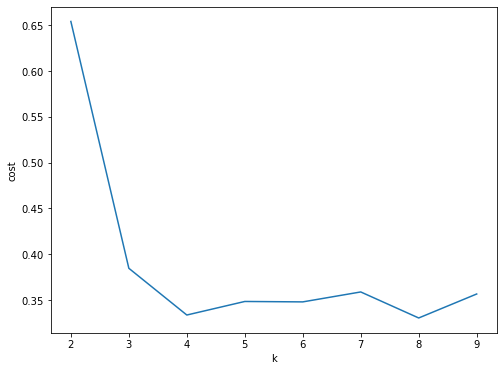

In [43]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')